# Classificadores multicitasses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
from sklearn import svm

In [2]:
np.random.seed(123456)
N = 200
path_out_D = 'Data/saidaSim_D_SepLin.txt'
path_out_I = 'Data/saidaSim_I_SepLin.txt'

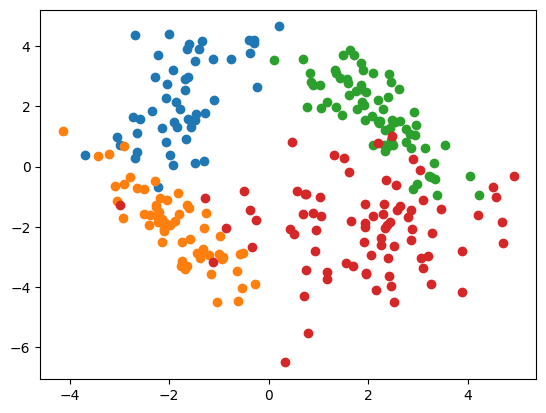

In [3]:
#Conjunto D - Treinamento
mu1 = [-2, 2]
sigma1 =[[0.75, 0.75], [0.75, 2.0]]
rotulo1 = 1
qnt1 = 50
mu2 = [-2,-2]
sigma2 = [[0.5, -0.5], [-0.5, 1]]
rotulo2 = 2
qnt2 = 60
mu3 = [2, 2]
sigma3 = [[0.5, -0.5], [-0.5, 1]]
rotulo3 = 3
qnt3 = 70
mu4 = [2, -2]
sigma4 = [[2, 0], [0, 2]]
rotulo4 = 4
qnt4 = 80

rotulos = np.array([rotulo1, rotulo2, rotulo3, rotulo4])
quantidades = np.array([qnt1,qnt2,qnt3,qnt4])
conjMu = np.array([mu1,mu2,mu3,mu4])
conjSigma = np.array([sigma1,sigma2,sigma3,sigma4])

f = open(path_out_D, "w")
for r in range(rotulos.size):
    dados = np.random.multivariate_normal(conjMu[r,:], conjSigma[r,:,:], quantidades[r]).T
    plt.scatter(dados[0,:], dados[1,:])
    
    for i in range(0,quantidades[r]):
        st = str(rotulos[r])
        for j in range(0,dados.shape[0]):
            st += ','+ str(dados[j,i])
        st += '\n'
        f.write(st)

f.close()

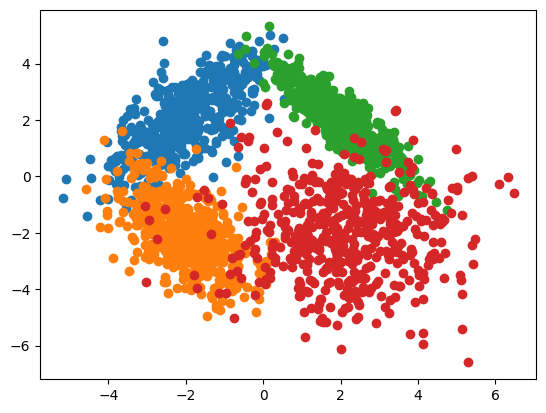

In [4]:
#Conjunto I - Avaliação
mu1 = [-2, 2]
sigma1 =[[1.0, 0.85], [0.85 , 1.5]]
rotulo1 = 1
qnt1 = 500
mu2 = [-2, -2]
sigma2 = [[0.75, -0.5], [-0.5 , 1.25]]
rotulo2 = 2
qnt2 = 500
mu3 = [2, 2]
sigma3 = [[0.75, -0.75], [-0.75 , 1.0]]
rotulo3 = 3
qnt3 = 500
mu4 = [2, -2]
sigma4 = [[2.5, 0], [0, 2.5]]
rotulo4 = 4
qnt4 = 500

rotulos = np.array([rotulo1, rotulo2, rotulo3, rotulo4])
quantidades = np.array([qnt1,qnt2,qnt3,qnt4])
conjMu = np.array([mu1,mu2,mu3,mu4])
conjSigma = np.array([sigma1,sigma2,sigma3,sigma4])

f = open(path_out_I, "w")
for r in range(rotulos.size):
    dados = np.random.multivariate_normal(conjMu[r,:], conjSigma[r,:,:], quantidades[r]).T
    plt.scatter(dados[0,:], dados[1,:])
    
    for i in range(0,quantidades[r]):
        st = str(rotulos[r])
        for j in range(0,dados.shape[0]):
            st += ','+ str(dados[j,i])
        st += '\n'
        f.write(st)

f.close()

In [5]:
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack((data , np.asarray(row).astype(float))) # type: ignore
            except:
                data = np.asarray(row).astype(float)
    f.close()
    y = data[:,0] # type: ignore
    x = data[:,1:] # type: ignore
    return y,x

### Função de predição

In [6]:
def class_predictor(x,w):
    if (w.dot(np.hstack((1,x))) >= 0): return 1
    else: return -1

### Função discriminante

In [7]:
def disc_function_value(x,w):
    return w.dot(np.hstack((1,x)))

### Algoritmo Soma dos Erros Quadráticos

In [8]:
def SSE(x,y):
    w = np.zeros(x.shape[1] + 1)
    A = np.zeros((x.shape[1] + 1, x.shape[1] + 1))
    B = np.zeros(x.shape[1] + 1)
    
    for xi, yi in zip(x,y):
        A += (np.asmatrix(np.hstack((1, xi)) ).T).dot(np.asmatrix(np.hstack((1, xi))))
        B += yi * np.hstack((1, xi))
        
    w = B.dot(np.linalg.inv(A))
    return w

### Implementação da estratégia OVR adaptada ao SSE

In [9]:
def multiclass_ovr_sse(trainX, trainY, dataset):
    N = dataset.shape[0]
    claIndex = np.unique(trainY)
    discFun = np.ndarray((claIndex.size , N))
    for k in range(0,claIndex.size):

        labelPos = np.where(trainY == claIndex[k])
        labelNeg = np.where(trainY != claIndex[k])
        binY = np.copy(trainY)
        binY[labelPos] = +1
        binY[labelNeg] = -1
        w =  SSE(trainX,binY)

        for i in range(0,N):
            padrao = dataset[i,:]
            discFun[k, i] = disc_function_value(padrao,w)

    yEst = np.zeros(N)
    
    for i in range(0, N):
        maxInd = np.where(discFun[:,i] == np.max(discFun[:,i]))
        yEst[i] = claIndex[maxInd]

    return yEst

In [10]:
path_D = 'Data/saidaSim_D_SepLin.txt'
path_I = 'Data/saidaSim_I_SepLin.txt'
yD,xD = read_class_data(path_D)
yI,xI = read_class_data(path_I)

In [11]:
xI.shape[0]

2000

### Classificação dos dados
* A função multiclass_ovr_dataset_sse é usada na classificação multiclasse;
* Os dois primeiros argumentos correspondem às informações de treinamento, já o terceiro argumento compreende o conjunto de dados a ser classificado;
* Em especial, os dados a serem classificados estão organizados em uma matriz $N \times n$, sendo $N$ o número de exemplos a ser classificado e $n$ é a dimensão dos padrões (neste caso $n=2$)

In [12]:
yEst = multiclass_ovr_sse(xD, yD, xI)

### Avaliação da acurácia
* É apenas feita uma contagem do número de concordâncias entre $\texttt{yI}$ e $\texttt{yEst}$
* O valor obtido é dividido por $N$, a fim de expressar a precisão em termos de porcentagem

In [13]:
acerto = np.count_nonzero( yI == yEst ) / yI.size
print("Acerto: %f "%(acerto))

Acerto: 0.893000 


### Visualização dos resultados
* Acertos de classificação serão denotados em azul
* Erros de classificação serão denotados em vermelho

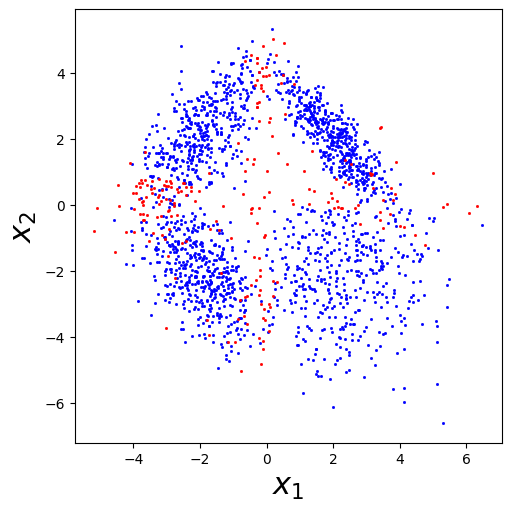

In [14]:
FS = (5,5)
fig = plt.figure(constrained_layout=True, figsize=FS)

posAcerto = np.where((yI-yEst) == 0)
posErro   = np.where((yI-yEst) != 0)

plt.plot(xI[posAcerto, 0], xI[posAcerto, 1], 's', color='blue', markersize=1)
plt.plot(xI[posErro, 0], xI[posErro, 1], 's', color='red', markersize=1)

plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22)

plt.show()

### Classificação dos dados
* $\texttt{g}$ é uma instanciação gerada via svm.SVC
* $C=100$ e $\texttt{kernel='linear'}$ são parâmetros do método
* $\texttt{decision\_function\_shape='ovr'}$ determina o uso da estratégia 'ovr'
* O Treinamento é efetuado pelo método 'fit'
* A classificação (predição) é realizada pelo método 'predict'

In [15]:
g = svm.SVC(C=100, kernel='linear', decision_function_shape='ovr')
g.fit(xD,yD)

yEst = g.predict(xI)

### Avaliação da acurácia
* É apenas feita uma contagem do número de concordâncias entre $\texttt{yI}$ e $\texttt{yEst}$
* O valor obtido é dividido por $N$, a fim de expressar a precisão em termos de porcentagem

In [16]:
acerto = np.count_nonzero(yI == yEst) / yI.size
print("Acerto: %f "%(acerto))

Acerto: 0.912000 


### Visualização dos resultados
* Acertos de classificação serão denotados em azul
* Erros de classificação serão denotados em vermelho

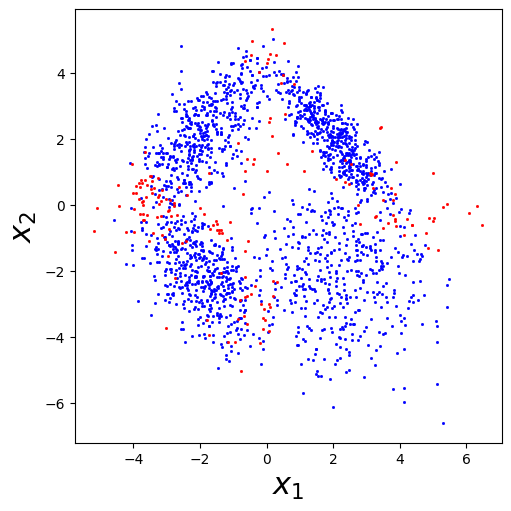

In [17]:
FS = (5,5)
fig = plt.figure(constrained_layout=True, figsize=FS)

posAcerto = np.where((yI-yEst) == 0)
posErro = np.where((yI-yEst) != 0)

plt.plot(xI[posAcerto,0],xI[posAcerto,1],'s',color='blue', markersize=1)
plt.plot(xI[posErro,0],xI[posErro,1],'s',color='red', markersize=1)
plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22)

plt.show()

In [18]:
g = svm.SVC(C=100,kernel='linear',decision_function_shape='ovo')
g.fit(xD,yD)

SVC(C=100, decision_function_shape='ovo', kernel='linear')

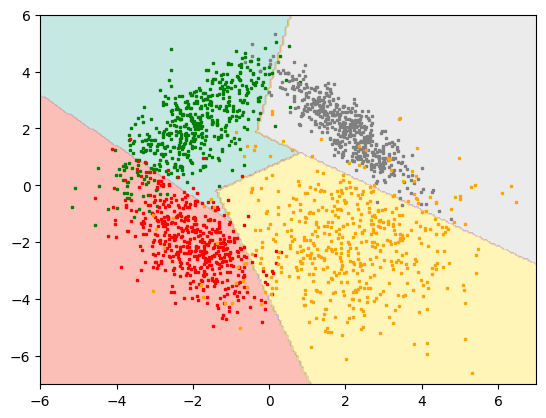

In [19]:
minX, maxX = np.floor(np.min(xI[:, 0])), np.ceil(np.max(xI[:, 0]))
minY, maxY = np.floor(np.min(xI[:, 1])), np.ceil(np.max(xI[:, 1]))

X1 = np.linspace(minX, maxX, N)
X2 = np.linspace(minY, maxY, N)
X1, X2 = np.meshgrid(X1, X2)

cla = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        cla[i,j] = g.predict([[X1[i, j], X2[i, j]]]) 

plt.contourf(X1, X2, cla, cmap=cm.Set3, alpha=0.5) # type: ignore
plt.plot(xI[np.where(yI == +1), 0], xI[np.where(yI == +1), 1], 's', color='green', markersize=2)
plt.plot(xI[np.where(yI == +2), 0], xI[np.where(yI == +2), 1], 's', color='red', markersize=2)
plt.plot(xI[np.where(yI == +3), 0], xI[np.where(yI == +3), 1], 's', color='grey', markersize=2)
plt.plot(xI[np.where(yI == +4), 0], xI[np.where(yI == +4), 1], 's', color='orange', markersize=2)

plt.show()

### Vamos repetir o processo, agora com a estratégia OVR
* Com uso do kernel linear, é esperado que as alterações no resultados sejam mínimas (caso ocorram)

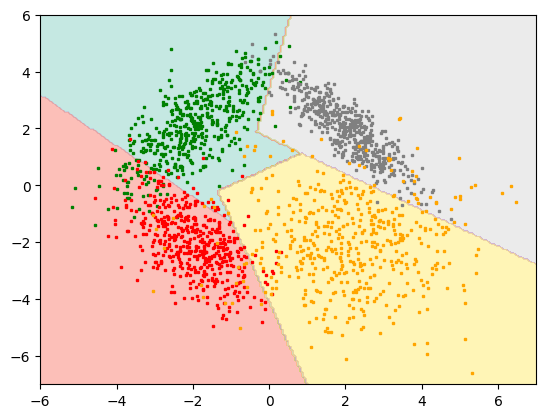

In [20]:
g = svm.SVC(C=1000, kernel='linear', decision_function_shape='ovr')
g.fit(xD,yD)

minX, maxX = np.floor(np.min(xI[:, 0])), np.ceil(np.max(xI[:, 0]))
minY, maxY = np.floor(np.min(xI[:, 1])), np.ceil(np.max(xI[:, 1]))

N = 200
X1 = np.linspace(minX, maxX, N)
X2 = np.linspace(minY, maxY, N)
X1, X2 = np.meshgrid(X1, X2)

cla = np.ndarray((N, N))
for i in range(0,N):
    for j in range(0,N):
        cla[i,j] = g.predict([[X1[i, j], X2[i, j]]]) 

plt.contourf(X1, X2, cla, cmap=cm.Set3, alpha=0.5) # type: ignore
plt.plot(xI[np.where(yI == +1), 0], xI[np.where(yI == +1), 1], 's', color='green', markersize=2)
plt.plot(xI[np.where(yI == +2), 0], xI[np.where(yI == +2), 1], 's', color='red', markersize=2)
plt.plot(xI[np.where(yI == +3), 0], xI[np.where(yI == +3), 1], 's', color='grey', markersize=2)
plt.plot(xI[np.where(yI == +4), 0], xI[np.where(yI == +4), 1], 's', color='orange', markersize=2)
plt.show()

### Vamos repetir o processo, agora com a estratégia OVO

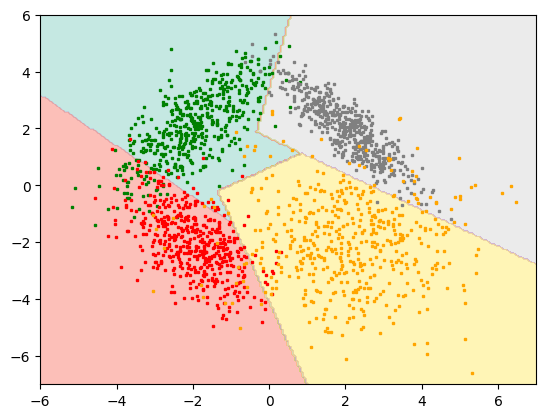

In [21]:
g = svm.SVC(C=1000, kernel='linear', decision_function_shape='ovo')
g.fit(xD,yD)

minX, maxX = np.floor(np.min(xI[:, 0])), np.ceil(np.max(xI[:, 0]))
minY, maxY = np.floor(np.min(xI[:, 1])), np.ceil(np.max(xI[:, 1]))

N = 200
X1 = np.linspace(minX, maxX, N)
X2 = np.linspace(minY, maxY, N)
X1, X2 = np.meshgrid(X1, X2)

cla = np.ndarray((N, N))
for i in range(0,N):
    for j in range(0,N):
        cla[i,j] = g.predict([[X1[i, j], X2[i, j]]]) 

plt.contourf(X1, X2, cla, cmap=cm.Set3, alpha=0.5) # type: ignore
plt.plot(xI[np.where(yI == +1), 0], xI[np.where(yI == +1), 1], 's', color='green', markersize=2)
plt.plot(xI[np.where(yI == +2), 0], xI[np.where(yI == +2), 1], 's', color='red', markersize=2)
plt.plot(xI[np.where(yI == +3), 0], xI[np.where(yI == +3), 1], 's', color='grey', markersize=2)
plt.plot(xI[np.where(yI == +4), 0], xI[np.where(yI == +4), 1], 's', color='orange', markersize=2)
plt.show()